# loading log

In [320]:
import pandas as pd

def parse(log_file):
    df = pd.DataFrame()
    columns=['duration', 'loss', 'acc', 'val_loss', 'val_acc']
    with open(log_file) as f:
        for line in f:
            if re.match(r'\d+/\d+ \[={30}\]', line):
                line = re.sub(r"\d+/\d+ \[={30}\] -", "", line)
                line = re.sub(r'(\d+)s', r'\1', line)
                line = re.sub(r'- [\w_]+:', ',', line)
                s = [float(c) for c in line.split(',')]
                s = dict(zip(columns, s))
                df = df.append(s, ignore_index=True)
    df.index += 1
    return df

In [328]:
def get_loss(log_dir):
    def get_name_and_path(f):
        name = os.path.splitext(os.path.basename(f))[0]
        path = os.path.join(log_dir, f)
        return name, path

    if os.path.isdir(log_dir):
        log_files = dict(get_name_and_path(f) for f in os.listdir(log_dir) if f.endswith('.txt'))
    else:
        log_files = dict([(os.path.splitext(os.path.basename(log_dir))[0], log_dir)])

    df_loss = pd.DataFrame({'loss': [], 'val_loss': []})
    df_acc = pd.DataFrame({'acc': [], 'val_acc': []})
    for name, log in log_files.items():
        df = parse(log)
        df_loss = df_loss.join(df[['loss', 'val_loss']], how='outer', rsuffix='_%s' % name)
        df_acc = df_acc.join(df[['acc', 'val_acc']], how='outer', rsuffix='_%s' % name)

    df_loss.drop(['loss', 'val_loss'], axis=1, inplace=True)
    df_acc.drop(['acc', 'val_acc'], axis=1, inplace=True)
    return df_loss, df_acc

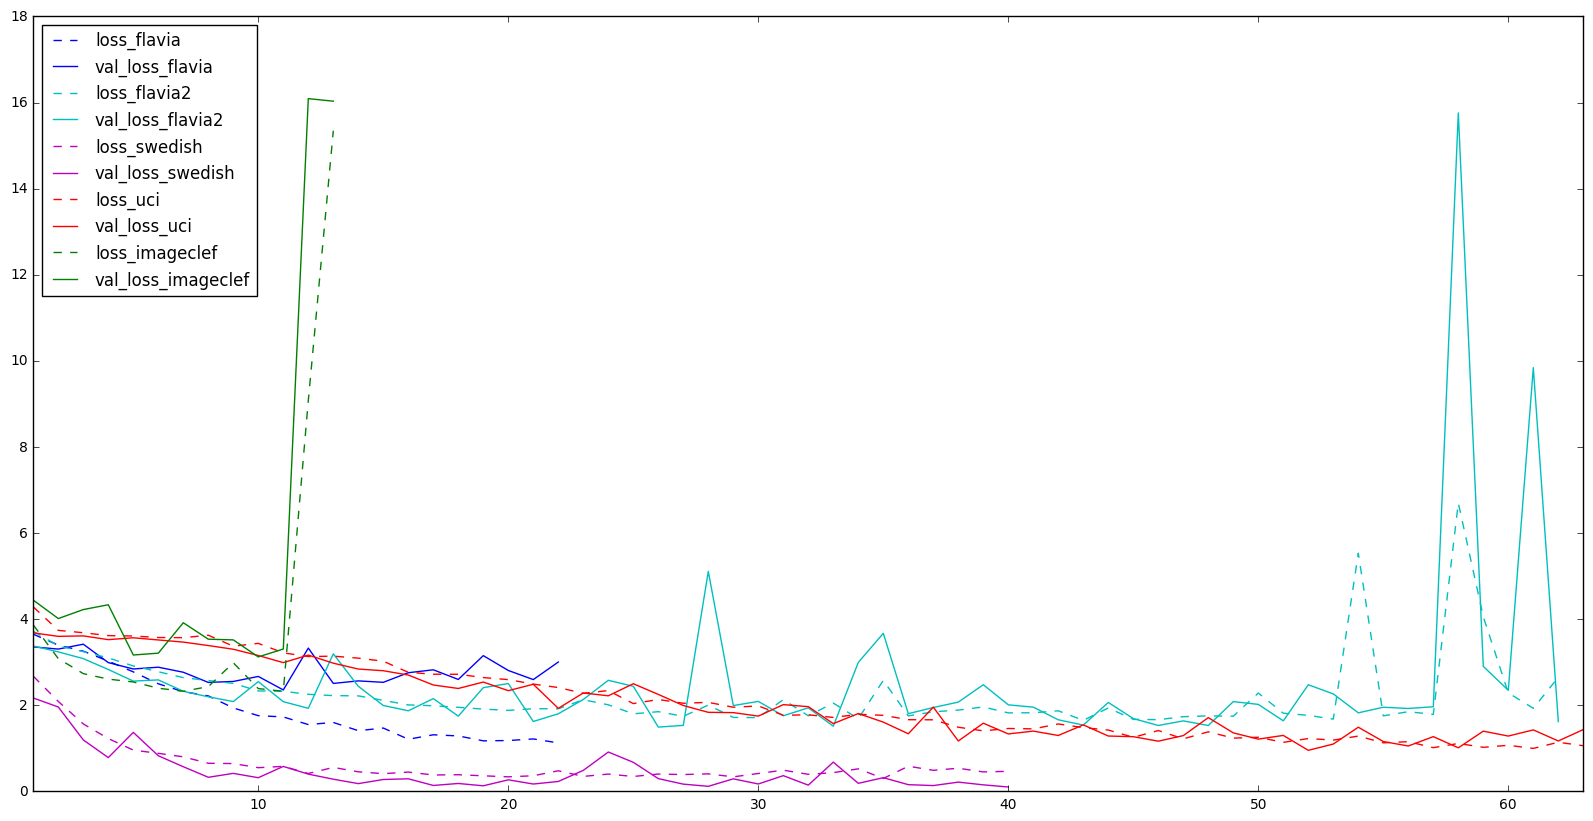

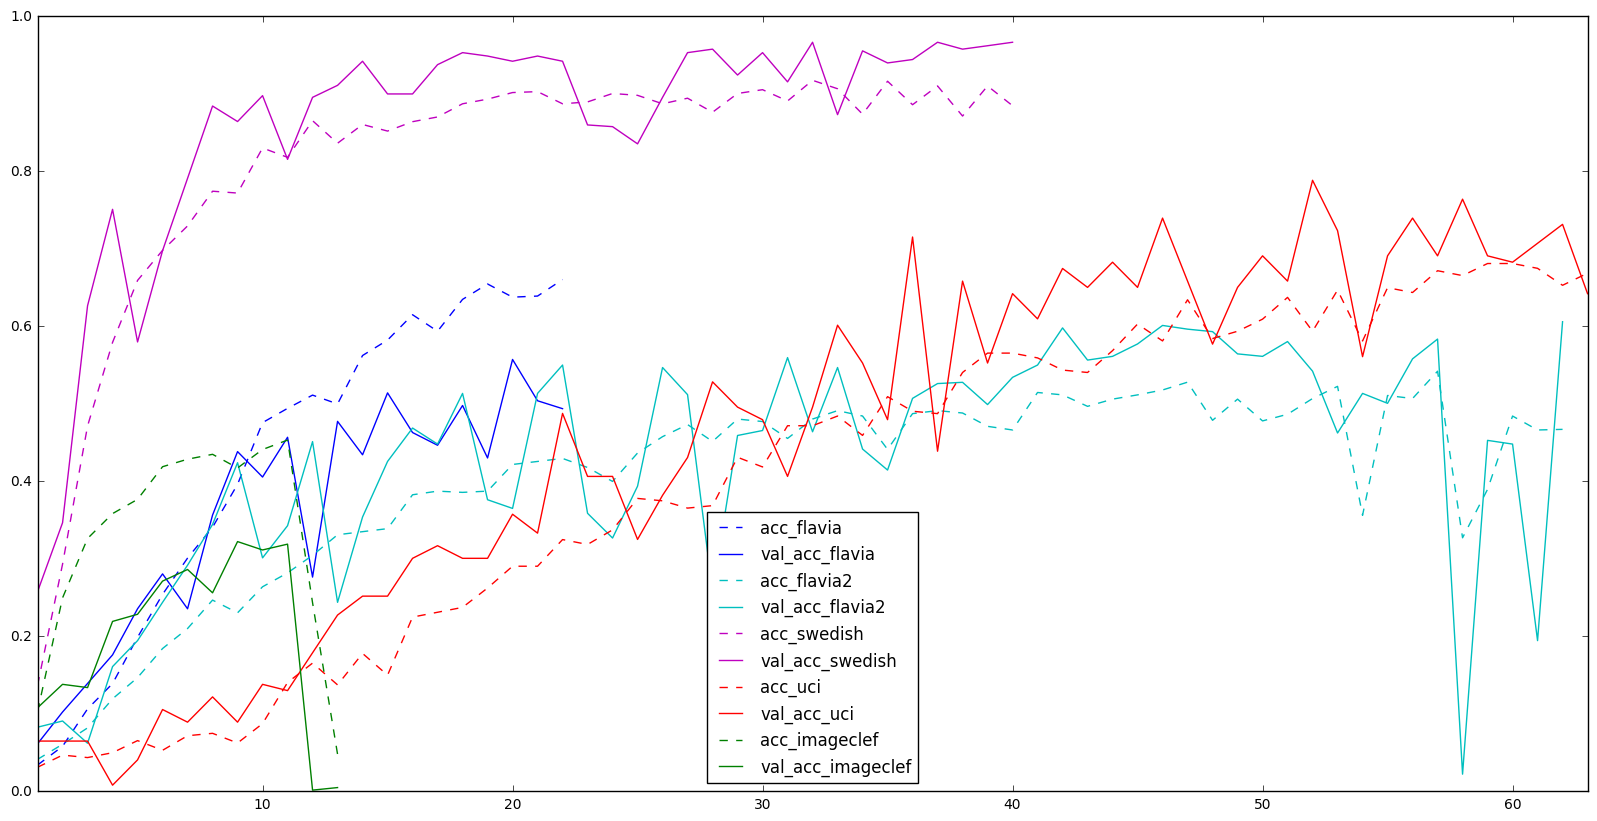

In [336]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
# fig, axes = plt.subplots(nrows=2, ncols=1)

import os
log_dir = '../history/output/custom_cnn'
df_loss, df_acc = get_loss(log_dir)

colors = 'bcmrgykw'
i = 0
for c in df_loss.columns:
    color_index = int(i/2)
    if c.startswith('val_'):
        df_loss[c].plot(style=colors[color_index] + '-', lw=1, legend=True)
    else:
        df_loss[c].plot(style=colors[color_index] + '--', legend=True)
    i += 1
        
plt.show()

logy = False
i = 0
for c in df_acc.columns:
    color_index = int(i/2)
    if c.startswith('val_'):
        df_acc[c].plot(style=colors[color_index] + '-', lw=1, logy=logy, legend=True)
    else:
        df_acc[c].plot(style=colors[color_index] + '--', logy=logy, legend=True)
    i += 1

plt.show()